In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from functions_scores import *
from sklearn.datasets import load_iris
dataname ='iris'
X,y = load_iris(return_X_y=True)
Scaler = MinMaxScaler().fit(X)
X_sc = Scaler.transform(X)
pt_cloud = X_sc

In [2]:
# rc = gd.RipsComplex(pt_cloud, max_edge_length = maxDist(pt_cloud)/2)
# st = rc.create_simplex_tree(max_dimension = 2)
# L = st.get_filtration()
# my_data =[list(simplex) for simplex in L]

In [3]:
# Sage için gerekli bilgiler
print("Maksimum epsilon değeri:", np.round(maxDist(pt_cloud)/2,2))
print("Matris Boyutları:", pt_cloud.shape[0])

Maksimum epsilon değeri: 0.83
Matris Boyutları: 150


In [4]:
# with open("Complexes_Data/iris_complexes.txt", "w") as file:
#     file.write(json.dumps(my_data))
# file.close()

# After Sage

In [5]:
Methods = ['single',  'average', 'complete', 'ward']
Metrics = ['braycurtis', 'cosine', 'euclidean','cityblock']
n_cluster  = len(np.unique(y))

## Homological and Minkowski Distance with p = 1/2

In [6]:
hom_distance = All2One("Matrix_Data/"+ dataname + "_result/*.npy")
minkowski = squareform(pdist(pt_cloud, minkowski_distance))

## Unsupervised Scores

In [7]:
Scores_list = [homogeneity_score, v_measure_score, adjusted_rand_score,
               adjusted_mutual_info_score, fowlkes_mallows_score, completeness_score, mutual_info_score, rand_score]
Scores_Cluster = {}
temp = []
for score in Scores_list:
    Scores_Cluster[score.__name__]= Unsupervised_Scores(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster,y,score)
    temp.append(Scores_Cluster[score.__name__])
    
Unsupervised_Scores = pd.concat(temp, axis=1)
Unsupervised_Scores.T

,braycurtis,cosine,euclidean,cityblock,minkowski,homological
homogeneity_score,0.68707,0.582773,0.769718,0.744132,0.73108,0.583617
method,ward,ward,average,ward,average,single
v_measure_score,0.720118,0.720118,0.78374,0.759337,0.754001,0.723479
method,single,single,average,average,average,single
adjusted_rand_score,0.624954,0.558371,0.719584,0.706006,0.663434,0.565747
method,ward,single,average,ward,average,single
adjusted_mutual_info_score,0.715566,0.715566,0.780978,0.756228,0.750813,0.718994
method,single,single,average,average,average,single
fowlkes_mallows_score,0.764206,0.764206,0.815874,0.8064,0.78245,0.767344
method,single,single,average,ward,average,single


In [8]:
Unsupervised_Scores.T.to_csv('Scores/'+ dataname +'/unsupervised.csv')

## Supervised Scores with Hungarian Matching Method

In [9]:
Score_list = ['accuracy', 'f1', 'false_discovery_rate', 'false_negative_rate',
       'false_positive_rate', 'negative_predictive_value',
       'positive_predictive_value', 'precision', 'recall', 'sensitivity',
       'specificity', 'true_negative_rate', 'true_positive_rate']

Scores_Class= {}
Scores_Class_hungarian = {}
Scores_Class_pair = {}
Scores_Class_myoptim ={}
temp = []
for score in Score_list:
    Scores_Class_hungarian[score] = Supervised_Scores_hungarian(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster,y,score)
    temp.extend([Scores_Class_hungarian[score]])
Supervised_Scores = pd.concat(temp, axis =1)
Supervised_Scores.T

,braycurtis,cosine,euclidean,cityblock,minkowski,homological
hungarian_max_accuracy,0.884444,0.791111,0.924444,0.92,0.902222,0.84
method,ward,ward,average,ward,average,ward
hungarian_max_f1,0.826667,0.686667,0.886667,0.88,0.853333,0.76
method,ward,ward,average,ward,average,ward
hungarian_max_false_discovery_rate,0.34,0.34,0.34,0.32,0.326667,0.666667
method,single,single,single,single,single,complete
hungarian_max_false_negative_rate,0.34,0.34,0.34,0.32,0.326667,0.666667
method,single,single,single,single,single,complete
hungarian_max_false_positive_rate,0.17,0.17,0.17,0.16,0.163333,0.333333
method,single,single,single,single,single,complete


In [10]:
Supervised_Scores.T.to_csv('Scores/'+ dataname +'/supervised.csv')

# Silhouette Scores

In [11]:
Unsup_Silhoutte = Sil_Scores(Methods, Metrics, pt_cloud, minkowski, hom_distance, n_cluster, silhouette_score)
Unsup_Silhoutte

,silhouette_score,method
braycurtis,0.532353,single
cosine,0.532353,single
euclidean,0.532353,single
cityblock,0.503516,ward
minkowski,0.558726,ward
homological,0.498421,ward


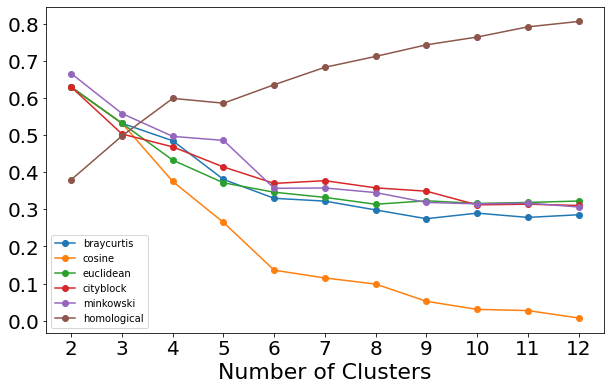

In [12]:
sil_score_plot_1(Methods, Metrics,pt_cloud, minkowski, hom_distance, np.arange(2,13), silhouette_score, dataname)

In [13]:
Unsup_Silhoutte.to_csv('Scores/'+ dataname +'/silhouette.csv')

In [14]:
Entropy(Methods, Metrics, pt_cloud, minkowski, hom_distance, n_cluster)

,single,average,complete,ward
braycurtis,0.669194,0.669194,0.669194,1.018552
cosine,0.669194,0.669194,0.669194,0.838206
euclidean,0.669194,1.0593,1.063871,1.0593
cityblock,0.701874,1.037949,1.031816,1.063871
minkowski,0.701874,1.037949,1.031816,1.063871
homological,0.701874,1.037949,1.031816,1.063871


-----------------------------------